In [3]:
#Tiền xử lý dữ liệu với tập dữ liệu Brain Tumor Segmentation DataData

Đang tải no_tumor:   0%|          | 0/1595 [00:00<?, ?it/s]

Đang tải glioma_tumor:   0%|          | 0/649 [00:00<?, ?it/s]

Đang tải meningioma_tumor:   0%|          | 0/999 [00:00<?, ?it/s]

Đang tải pituitary_tumor:   0%|          | 0/994 [00:00<?, ?it/s]

Số lượng hình ảnh: 4237, Số lượng mặt nạ: 4237, Số lượng nhãn: 4237


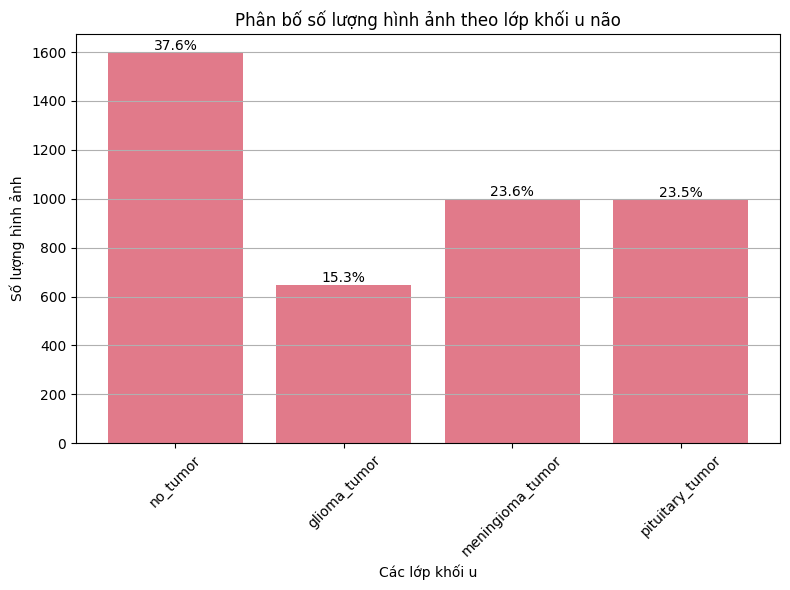

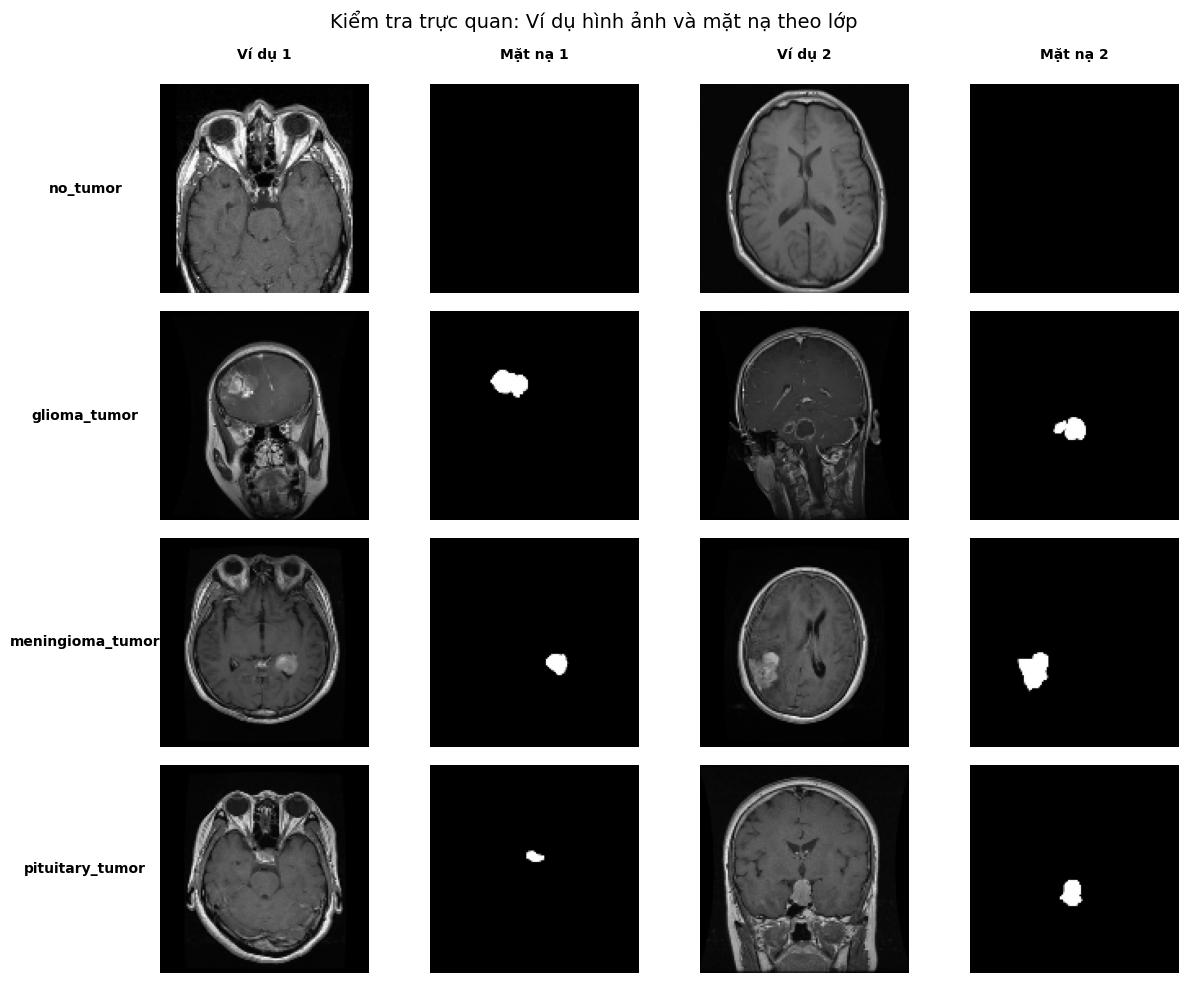

Bộ dữ liệu huấn luyện - Hình ảnh: (2965, 128, 128, 1), Mặt nạ: (2965, 128, 128, 1), Nhãn: (2965,)
Bộ dữ liệu xác thực - Hình ảnh: (1272, 128, 128, 1), Mặt nạ: (1272, 128, 128, 1), Nhãn: (1272,)


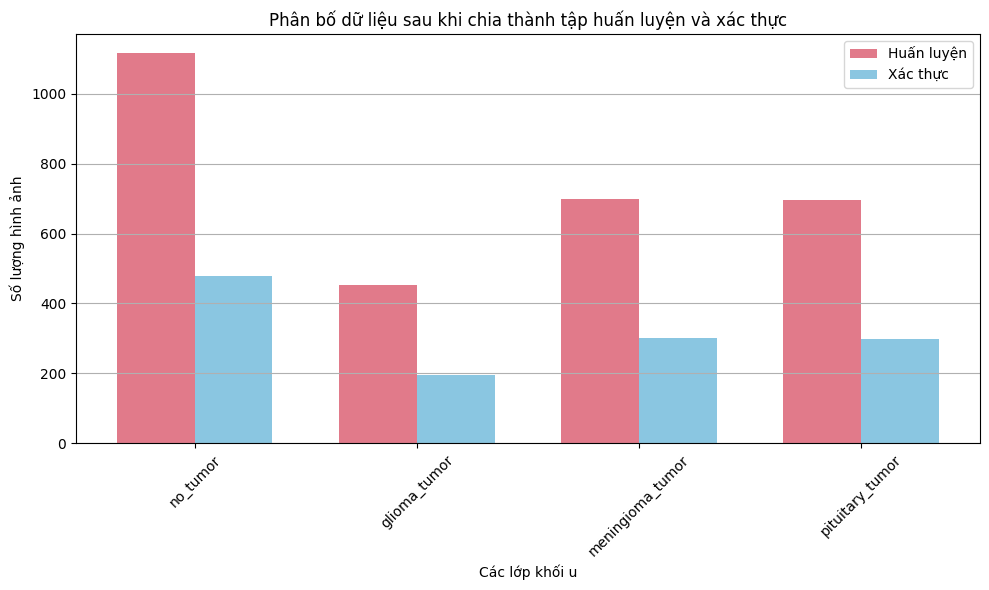

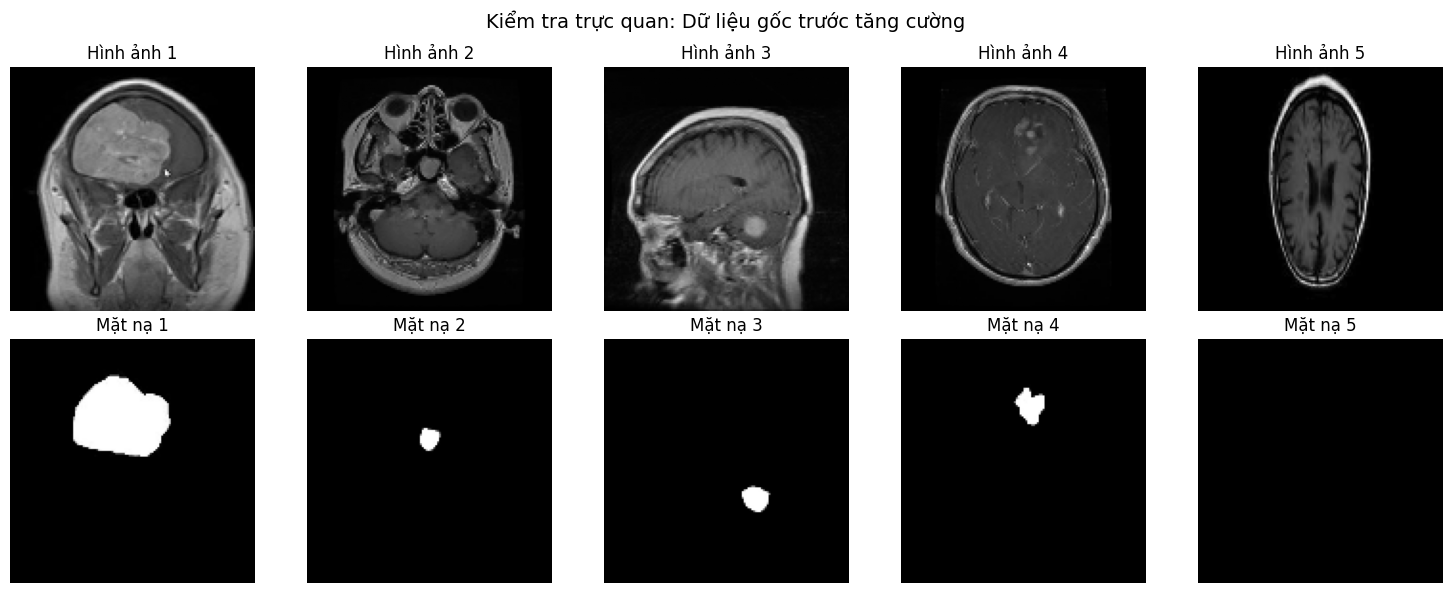

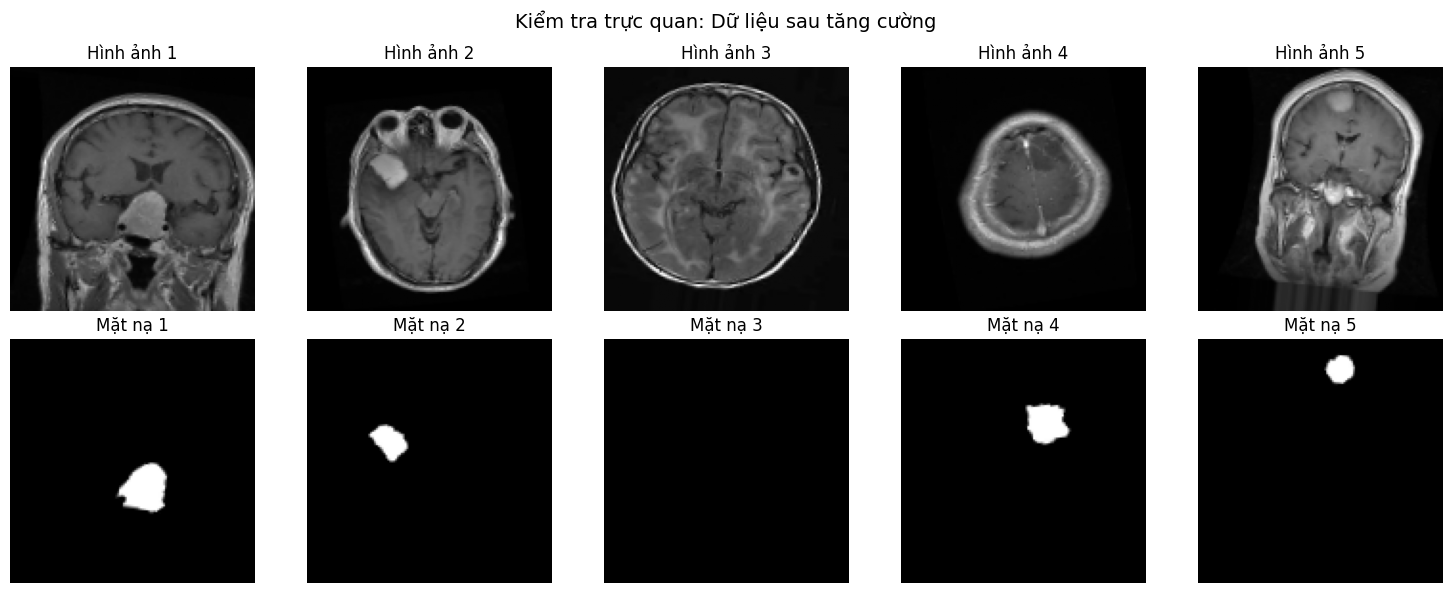

'\nPhần tiền xử lý kết thúc tại đây. Tiếp theo sẽ là định nghĩa mô hình và huấn luyện (model.fit).\n'

In [4]:
# """
# Phân đoạn khối u não với U-net - Phần tiền xử lý dữ liệu
# """

# import os
# import cv2
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from tqdm.notebook import tqdm
# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import warnings
# warnings.filterwarnings("ignore")

# """
# Bộ dữ liệu này bao gồm 4237 hình ảnh IRM của các khối u não, mỗi hình ảnh đi kèm với một mặt nạ thủ công được tạo bởi các chuyên gia, 
# cho phép xác định chính xác đường viền của các khối u. Bộ dữ liệu này đóng vai trò là tham chiếu để huấn luyện mô hình phân đoạn, 
# tập trung vào bốn loại khối u: (glioma, meningioma, pituitary, and no tumor).

# Dataset source: https://www.sciencedirect.com/science/article/pii/S095741742302849X#tbl3

# Image:
# * 0 (No Tumor, 1595 images),
# * 1 (Glioma, 649 images),
# * 2 (Meningioma, 999 images),
# * 3 (Pituitary, 994 images),

# Mask:
# * 0 (No Tumor, 1595 images),
# * 1 (Glioma, 650 images),
# * 2 (Meningioma, 1000 images),
# * 3 (Pituitary, 994 images),
# """

# # Đường dẫn truy cập dữ liệu
# data_path = "Brain Tumor Segmentation Dataset"
# classes = ['no_tumor', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']
# images = []
# masks = []
# labels = []
# target_size = (128, 128)

# # Tải hình ảnh và mặt nạ
# for class_name in classes:
#     image_folder = os.path.join(data_path, 'image', str(classes.index(class_name)))
#     mask_folder = os.path.join(data_path, 'mask', str(classes.index(class_name)))
    
#     if os.path.exists(image_folder) and os.path.exists(mask_folder):
#         for image_name in tqdm(os.listdir(image_folder), desc=class_name):
#             if image_name.endswith('.jpg') or image_name.endswith('.png'):
#                 image_path = os.path.join(image_folder, image_name)
#                 image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#                 image = cv2.resize(image, target_size)  # Thay đổi kích thước hình ảnh
#                 image = image / 255.0  # Chuẩn hóa giá trị pixel về [0, 1]
                
#                 mask_name = image_name.replace('.jpg', '_m.jpg').replace('.png', '_m.png')
#                 mask_path = os.path.join(mask_folder, mask_name)
                
#                 if os.path.exists(mask_path):
#                     mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
#                     mask = cv2.resize(mask, target_size)  # Thay đổi kích thước mặt nạ
#                     mask = mask / 255.0  # Chuẩn hóa giá trị pixel về [0, 1]
                    
#                     images.append(image)
#                     masks.append(mask)
#                     labels.append(classes.index(class_name))
#                 else:
#                     print(f"Mặt nạ bị thiếu cho hình ảnh: {image_name}")

# # Chuyển đổi danh sách thành mảng NumPy và định dạng lại
# images = np.array(images).reshape(-1, 128, 128, 1)  # Thêm chiều kênh (channel)
# masks = np.array(masks).reshape(-1, 128, 128, 1)    # Thêm chiều kênh (channel)
# labels = np.array(labels)

# print(f"Số lượng hình ảnh: {len(images)}, Số lượng mặt nạ: {len(masks)}, Số lượng nhãn: {len(labels)}")

# # Trực quan hóa dữ liệu
# unique, counts = np.unique(labels, return_counts=True)
# class_counts = dict(zip(classes, counts))
# total_images = sum(class_counts.values())
# percentages = [(count / total_images) * 100 for count in class_counts.values()]

# plt.figure(figsize=(8, 6))
# bars = plt.bar(class_counts.keys(), class_counts.values(), color='#E17A8A')
# for bar, percentage in zip(bars, percentages):
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.1f}%', ha='center', va='bottom')
# plt.xlabel('Các lớp khối u')
# plt.ylabel("Số lượng hình ảnh")
# plt.title("Số lượng hình ảnh theo lớp khối u não")
# plt.xticks(rotation=45)
# plt.grid(axis='y')
# plt.tight_layout()
# plt.show()

# """
# Các lớp thể hiện sự phân bố không cân bằng, với lớp "no tumor" chiếm tỷ lệ đáng kể (37.6%), 
# trong khi các loại khối u khác có tỷ lệ thấp hơn. Sự mất cân bằng này có thể ảnh hưởng đến hiệu suất của mô hình U-Net
# """

# # Trực quan hóa các ví dụ
# fig, axs = plt.subplots(len(classes) + 1, 5, figsize=(10, 10), 
#                        gridspec_kw={'width_ratios': [0.5, 4, 4, 4, 4], 'height_ratios': [0.5, 4, 4, 4, 4]})
# axs[0, 0].text(0.5, 0.5, "", fontsize=10, ha='center', va='center', fontweight='bold')
# axs[0, 0].axis('off')
# axs[0, 1].text(0.5, 0.5, "Ví dụ 1", fontsize=10, ha='center', va='center', fontweight='bold')
# axs[0, 1].axis('off')
# axs[0, 2].text(0.5, 0.5, "Mặt nạ 1", fontsize=10, ha='center', va='center', fontweight='bold')
# axs[0, 2].axis('off')
# axs[0, 3].text(0.5, 0.5, "Ví dụ 2", fontsize=10, ha='center', va='center', fontweight='bold')
# axs[0, 3].axis('off')
# axs[0, 4].text(0.5, 0.5, "Mặt nạ 2", fontsize=10, ha='center', va='center', fontweight='bold')
# axs[0, 4].axis('off')

# for i, class_name in enumerate(classes):
#     class_index = classes.index(class_name)
#     example_index1 = np.where(labels == class_index)[0][0]
#     example_index2 = np.where(labels == class_index)[0][2]
#     image1 = images[example_index1]
#     mask1 = masks[example_index1]
#     image2 = images[example_index2]
#     mask2 = masks[example_index2]
    
#     axs[i + 1, 1].imshow(image1, cmap='gray')
#     axs[i + 1, 1].axis('off')
#     axs[i + 1, 2].imshow(mask1, cmap='gray')
#     axs[i + 1, 2].axis('off')
#     axs[i + 1, 3].imshow(image2, cmap='gray')
#     axs[i + 1, 3].axis('off')
#     axs[i + 1, 4].imshow(mask2, cmap='gray')
#     axs[i + 1, 4].axis('off')
#     axs[i + 1, 0].text(0.5, 0.5, class_name, fontsize=10, ha='center', va='center', fontweight='bold')
#     axs[i + 1, 0].axis('off')

# plt.tight_layout()
# plt.show()

# # Chia dữ liệu thành tập huấn luyện và tập xác thực
# images_train, images_val, masks_train, masks_val, labels_train, labels_val = train_test_split(
#     images, masks, labels, test_size=0.3, random_state=42, stratify=labels, shuffle=True
# )

# print(f"Bộ dữ liệu huấn luyện - Hình ảnh: {images_train.shape}, Mặt nạ: {masks_train.shape}, Nhãn: {labels_train.shape}")
# print(f"Bộ dữ liệu xác thực - Hình ảnh: {images_val.shape}, Mặt nạ: {masks_val.shape}, Nhãn: {labels_val.shape}")

# # Tạo generator tăng cường dữ liệu
# def train_generator(images, masks, batch_size, seed=42):
#     image_datagen = ImageDataGenerator(
#         rotation_range=20,
#         width_shift_range=0.1,
#         height_shift_range=0.1,
#         shear_range=0.1,
#         zoom_range=0.1,
#         horizontal_flip=True,
#         fill_mode='nearest'
#     )
#     mask_datagen = ImageDataGenerator(
#         rotation_range=20,
#         width_shift_range=0.1,
#         height_shift_range=0.1,
#         shear_range=0.1,
#         zoom_range=0.1,
#         horizontal_flip=True,
#         fill_mode='nearest'
#     )
#     image_generator = image_datagen.flow(images, batch_size=batch_size, seed=seed)
#     mask_generator = mask_datagen.flow(masks, batch_size=batch_size, seed=seed)
    
#     while True:
#         img_batch = next(image_generator)
#         mask_batch = next(mask_generator)
#         yield img_batch, mask_batch

# # Hàm hiển thị hình ảnh và mặt nạ để kiểm tra generator
# def plot_images(images, masks, num_images=5):
#     plt.figure(figsize=(15, 6))
#     for i in range(num_images):
#         plt.subplot(2, num_images, i + 1)
#         plt.imshow(images[i].reshape(128, 128), cmap='gray')
#         plt.axis('off')
#         plt.title('Hình ảnh')
#         plt.subplot(2, num_images, i + 1 + num_images)
#         plt.imshow(masks[i].reshape(128, 128), cmap='gray')
#         plt.axis('off')
#         plt.title('Mặt nạ')
#     plt.tight_layout()
#     plt.show()

# # Kiểm tra generator
# images_batch, masks_batch = next(train_generator(images_train, masks_train, batch_size=5))
# plot_images(images_batch, masks_batch, num_images=5)

# """
# Phần tiền xử lý kết thúc tại đây. Tiếp theo sẽ là định nghĩa mô hình và huấn luyện (model.fit).
# """


"""
Phân đoạn khối u não với U-net - Phần tiền xử lý dữ liệu
"""

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")

"""
Bộ dữ liệu này bao gồm 4237 hình ảnh IRM của các khối u não, mỗi hình ảnh đi kèm với một mặt nạ thủ công được tạo bởi các chuyên gia, 
cho phép xác định chính xác đường viền của các khối u. Bộ dữ liệu này đóng vai trò là tham chiếu để huấn luyện mô hình phân đoạn, 
tập trung vào bốn loại khối u: (glioma, meningioma, pituitary, and no tumor).

Dataset source: https://www.sciencedirect.com/science/article/pii/S095741742302849X#tbl3

Image:
* 0 (No Tumor, 1595 images),
* 1 (Glioma, 649 images),
* 2 (Meningioma, 999 images),
* 3 (Pituitary, 994 images),

Mask:
* 0 (No Tumor, 1595 images),
* 1 (Glioma, 650 images),
* 2 (Meningioma, 1000 images),
* 3 (Pituitary, 994 images),
"""

# Đường dẫn truy cập dữ liệu
data_path = "Brain Tumor Segmentation Dataset"
classes = ['no_tumor', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']
images = []
masks = []
labels = []
target_size = (128, 128)

# Bước 1: Tải hình ảnh và mặt nạ
for class_name in classes:
    image_folder = os.path.join(data_path, 'image', str(classes.index(class_name)))
    mask_folder = os.path.join(data_path, 'mask', str(classes.index(class_name)))
    
    if os.path.exists(image_folder) and os.path.exists(mask_folder):
        for image_name in tqdm(os.listdir(image_folder), desc=f"Đang tải {class_name}"):
            if image_name.endswith('.jpg') or image_name.endswith('.png'):
                image_path = os.path.join(image_folder, image_name)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                image = cv2.resize(image, target_size)  # Thay đổi kích thước hình ảnh
                image = image / 255.0  # Chuẩn hóa giá trị pixel về [0, 1]
                
                mask_name = image_name.replace('.jpg', '_m.jpg').replace('.png', '_m.png')
                mask_path = os.path.join(mask_folder, mask_name)
                
                if os.path.exists(mask_path):
                    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                    mask = cv2.resize(mask, target_size)  # Thay đổi kích thước mặt nạ
                    mask = mask / 255.0  # Chuẩn hóa giá trị pixel về [0, 1]
                    
                    images.append(image)
                    masks.append(mask)
                    labels.append(classes.index(class_name))
                else:
                    print(f"Mặt nạ bị thiếu cho hình ảnh: {image_name}")

# Bước 2: Chuyển đổi danh sách thành mảng NumPy và định dạng lại
images = np.array(images).reshape(-1, 128, 128, 1)  # Thêm chiều kênh (channel)
masks = np.array(masks).reshape(-1, 128, 128, 1)    # Thêm chiều kênh (channel)
labels = np.array(labels)

print(f"Số lượng hình ảnh: {len(images)}, Số lượng mặt nạ: {len(masks)}, Số lượng nhãn: {len(labels)}")

# Bước 3: Kiểm tra trực quan - Phân bố dữ liệu
unique, counts = np.unique(labels, return_counts=True)
class_counts = dict(zip(classes, counts))
total_images = sum(class_counts.values())
percentages = [(count / total_images) * 100 for count in class_counts.values()]

plt.figure(figsize=(8, 6))
bars = plt.bar(class_counts.keys(), class_counts.values(), color='#E17A8A')
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.1f}%', ha='center', va='bottom')
plt.xlabel('Các lớp khối u')
plt.ylabel("Số lượng hình ảnh")
plt.title("Phân bố số lượng hình ảnh theo lớp khối u não")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

"""
Nhận xét: Các lớp thể hiện sự phân bố không cân bằng, với lớp "no tumor" chiếm tỷ lệ đáng kể (37.6%), 
trong khi các loại khối u khác có tỷ lệ thấp hơn. Sự mất cân bằng này có thể ảnh hưởng đến hiệu suất của mô hình U-Net.
"""

# Bước 4: Kiểm tra trực quan - Hiển thị ví dụ hình ảnh và mặt nạ trước khi chia dữ liệu
fig, axs = plt.subplots(len(classes) + 1, 5, figsize=(12, 10), 
                       gridspec_kw={'width_ratios': [0.5, 4, 4, 4, 4], 'height_ratios': [0.5] + [4]*len(classes)})
axs[0, 0].text(0.5, 0.5, "", fontsize=10, ha='center', va='center', fontweight='bold')
axs[0, 0].axis('off')
axs[0, 1].text(0.5, 0.5, "Ví dụ 1", fontsize=10, ha='center', va='center', fontweight='bold')
axs[0, 1].axis('off')
axs[0, 2].text(0.5, 0.5, "Mặt nạ 1", fontsize=10, ha='center', va='center', fontweight='bold')
axs[0, 2].axis('off')
axs[0, 3].text(0.5, 0.5, "Ví dụ 2", fontsize=10, ha='center', va='center', fontweight='bold')
axs[0, 3].axis('off')
axs[0, 4].text(0.5, 0.5, "Mặt nạ 2", fontsize=10, ha='center', va='center', fontweight='bold')
axs[0, 4].axis('off')

for i, class_name in enumerate(classes):
    class_index = classes.index(class_name)
    example_index1 = np.where(labels == class_index)[0][0]  # Ví dụ đầu tiên
    example_index2 = np.where(labels == class_index)[0][min(2, len(np.where(labels == class_index)[0])-1)]  # Ví dụ thứ ba (nếu có)
    image1 = images[example_index1]
    mask1 = masks[example_index1]
    image2 = images[example_index2]
    mask2 = masks[example_index2]
    
    axs[i + 1, 1].imshow(image1.squeeze(), cmap='gray')
    axs[i + 1, 1].axis('off')
    axs[i + 1, 2].imshow(mask1.squeeze(), cmap='gray')
    axs[i + 1, 2].axis('off')
    axs[i + 1, 3].imshow(image2.squeeze(), cmap='gray')
    axs[i + 1, 3].axis('off')
    axs[i + 1, 4].imshow(mask2.squeeze(), cmap='gray')
    axs[i + 1, 4].axis('off')
    axs[i + 1, 0].text(0.5, 0.5, class_name, fontsize=10, ha='center', va='center', fontweight='bold')
    axs[i + 1, 0].axis('off')

plt.suptitle("Kiểm tra trực quan: Ví dụ hình ảnh và mặt nạ theo lớp", fontsize=14)
plt.tight_layout()
plt.show()

# Bước 5: Chia dữ liệu thành tập huấn luyện và tập xác thực
images_train, images_val, masks_train, masks_val, labels_train, labels_val = train_test_split(
    images, masks, labels, test_size=0.3, random_state=42, stratify=labels, shuffle=True
)

print(f"Bộ dữ liệu huấn luyện - Hình ảnh: {images_train.shape}, Mặt nạ: {masks_train.shape}, Nhãn: {labels_train.shape}")
print(f"Bộ dữ liệu xác thực - Hình ảnh: {images_val.shape}, Mặt nạ: {masks_val.shape}, Nhãn: {labels_val.shape}")

# Bước 6: Kiểm tra trực quan - Phân bố sau khi chia dữ liệu
def plot_split_distribution(labels_train, labels_val, classes):
    train_counts = np.bincount(labels_train)
    val_counts = np.bincount(labels_val)
    class_labels = [classes[i] for i in range(len(classes))]
    
    x = np.arange(len(classes))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - width/2, train_counts, width, label='Huấn luyện', color='#E17A8A')
    ax.bar(x + width/2, val_counts, width, label='Xác thực', color='#8AC6E1')
    
    ax.set_xlabel('Các lớp khối u')
    ax.set_ylabel('Số lượng hình ảnh')
    ax.set_title('Phân bố dữ liệu sau khi chia thành tập huấn luyện và xác thực')
    ax.set_xticks(x)
    ax.set_xticklabels(class_labels, rotation=45)
    ax.legend()
    ax.grid(axis='y')
    
    plt.tight_layout()
    plt.show()

plot_split_distribution(labels_train, labels_val, classes)

# Bước 7: Tạo generator tăng cường dữ liệu
def train_generator(images, masks, batch_size, seed=42):
    image_datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    mask_datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    image_generator = image_datagen.flow(images, batch_size=batch_size, seed=seed)
    mask_generator = mask_datagen.flow(masks, batch_size=batch_size, seed=seed)
    
    while True:
        img_batch = next(image_generator)
        mask_batch = next(mask_generator)
        yield img_batch, mask_batch

# Bước 8: Kiểm tra trực quan - Hiển thị dữ liệu sau tăng cường
def plot_images(images, masks, num_images=5, title="Hình ảnh và mặt nạ"):
    plt.figure(figsize=(15, 6))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(images[i].reshape(128, 128), cmap='gray')
        plt.axis('off')
        plt.title(f'Hình ảnh {i+1}')
        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(masks[i].reshape(128, 128), cmap='gray')
        plt.axis('off')
        plt.title(f'Mặt nạ {i+1}')
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# Kiểm tra dữ liệu gốc trước tăng cường
plot_images(images_train[:5], masks_train[:5], num_images=5, title="Kiểm tra trực quan: Dữ liệu gốc trước tăng cường")

# Kiểm tra dữ liệu sau tăng cường từ generator
images_batch, masks_batch = next(train_generator(images_train, masks_train, batch_size=5))
plot_images(images_batch, masks_batch, num_images=5, title="Kiểm tra trực quan: Dữ liệu sau tăng cường")

"""
Phần tiền xử lý kết thúc tại đây. Tiếp theo sẽ là định nghĩa mô hình và huấn luyện (model.fit).
"""